# Capstone week 1 data exploring

**This note book is mainly used for the Capstone Project**

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Data-Collisions.csv")
print("Database loaded successfully!")

Database loaded successfully!


/home/wg/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Find NaN columns

(194673, 38)
Columns and numver of NaN: X                   5334
Y                   5334
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
COLLISIONTYPE       4904
JUNCTIONTYPE        6329
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
dtype: int64


Text(0.5, 0, 'Column name')

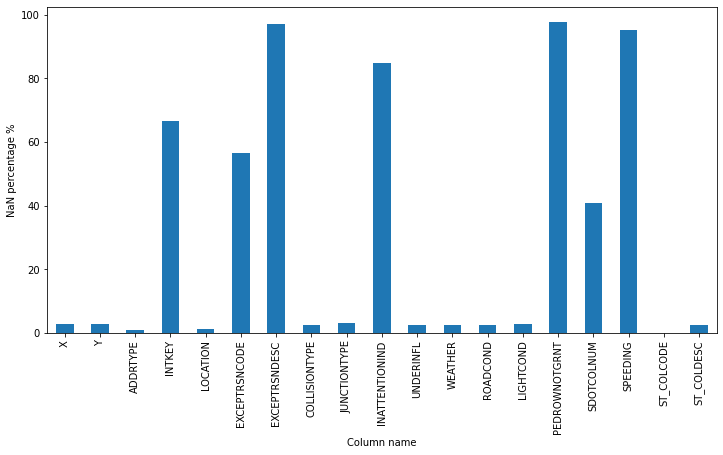

In [26]:
import matplotlib.pylab as plt
# print(df.info())
# print(df["ROADCOND"].isnull().sum())

#==========
# find columns with NaN
print(df.shape)
columns_with_nan = df.columns[df.isnull().any()].tolist()
num_of_na = df[columns_with_nan].isnull().sum()
print("Columns and numver of NaN:", num_of_na)
na_percentage = num_of_na/df.shape[0]*100
plt.figure(figsize=[12,6])
na_percentage.plot.bar()
plt.ylabel("NaN percentage %")
plt.xlabel("Column name")

### Drop columns with NaN > 30%

In [5]:
columns_tobe_cleaned = df.columns[df.isnull().sum()/df.shape[0] > 0.3].tolist() #columns with >30% NAN
print("Columns with >30% NaN:", columns_tobe_cleaned)

Columns with >30% NaN: ['INTKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING']


### Plot object type columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

<Figure size 432x288 with 0 Axes>

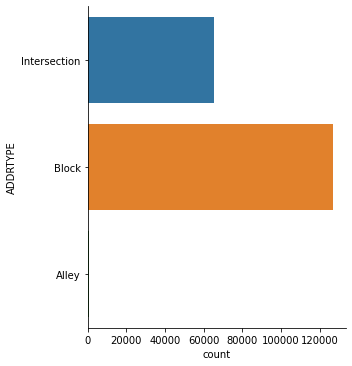

Index:  SEVERITYDESC
Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64


<Figure size 432x288 with 0 Axes>

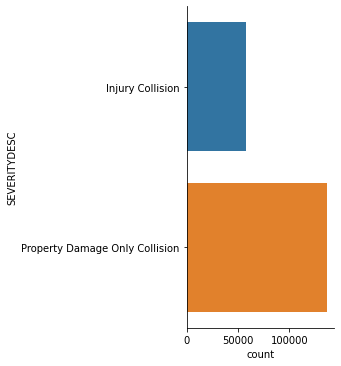

Index:  STATUS
Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64


<Figure size 432x288 with 0 Axes>

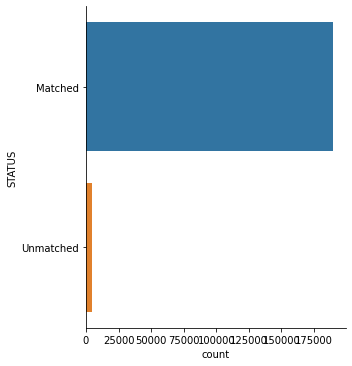

Index:  COLLISIONTYPE
Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64


<Figure size 432x288 with 0 Axes>

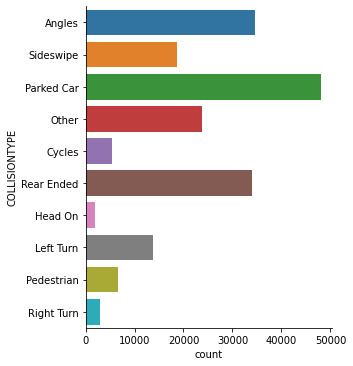

Index:  JUNCTIONTYPE
Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64


<Figure size 432x288 with 0 Axes>

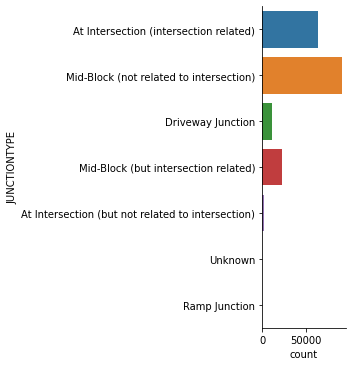

Index:  SDOT_COLDESC
MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          85209
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    54299
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          9928
NOT ENOUGH INFORMATION / NOT APPLICABLE                          9787
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    8856
MOTOR VEHCILE STRUCK PEDESTRIAN                                  6518
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           5852
MOTOR VEHICLE STRUCK OBJECT IN ROAD                              4741
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE            3104
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         1604
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          1440
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE             1312
MOTOR VEHICLE OVERTURNED IN ROAD                                  479
MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END                       181

<Figure size 432x288 with 0 Axes>

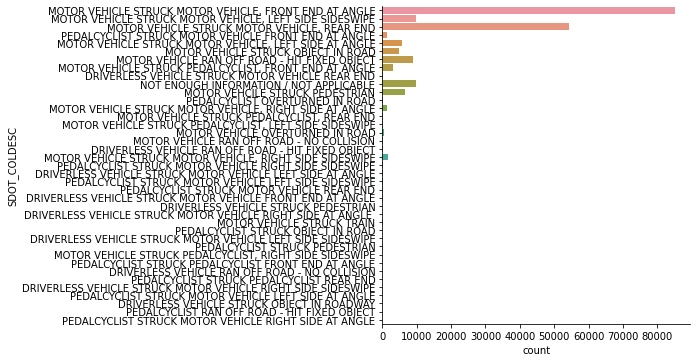

Index:  INATTENTIONIND
Y    29805
Name: INATTENTIONIND, dtype: int64


<Figure size 432x288 with 0 Axes>

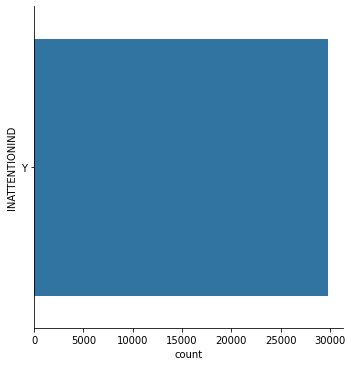

Index:  UNDERINFL
N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64


<Figure size 432x288 with 0 Axes>

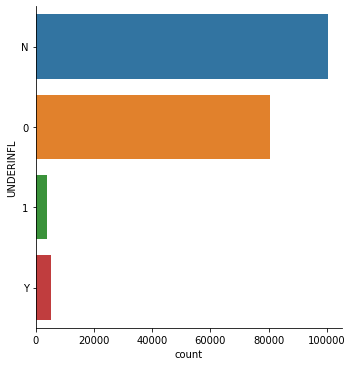

Index:  WEATHER
Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64


<Figure size 432x288 with 0 Axes>

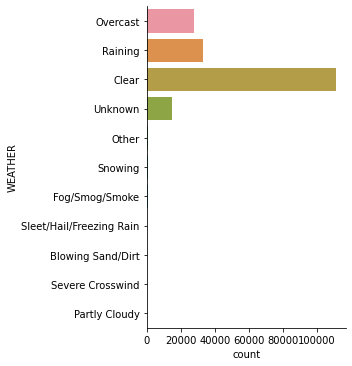

Index:  ROADCOND
Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64


<Figure size 432x288 with 0 Axes>

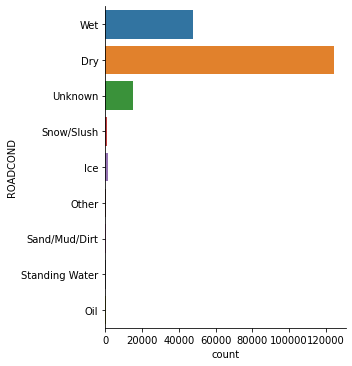

Index:  LIGHTCOND
Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


<Figure size 432x288 with 0 Axes>

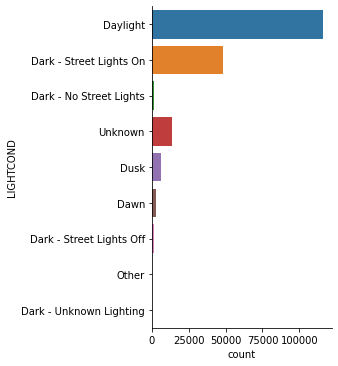

Index:  PEDROWNOTGRNT
Y    4667
Name: PEDROWNOTGRNT, dtype: int64


<Figure size 432x288 with 0 Axes>

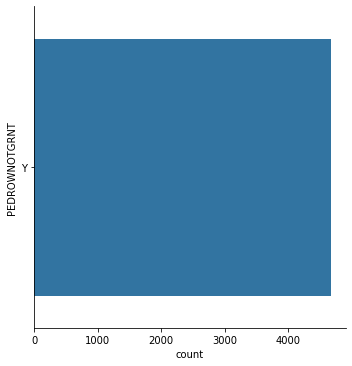

Index:  SPEEDING
Y    9333
Name: SPEEDING, dtype: int64


<Figure size 432x288 with 0 Axes>

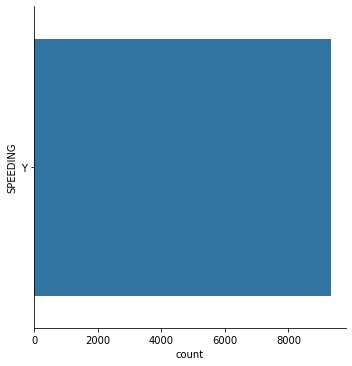

Index:  ST_COLCODE
32    27612
10    23427
14    16883
32    16809
10    11247
      ...  
87        1
43        1
54        1
49        1
60        1
Name: ST_COLCODE, Length: 115, dtype: int64


<Figure size 432x288 with 0 Axes>

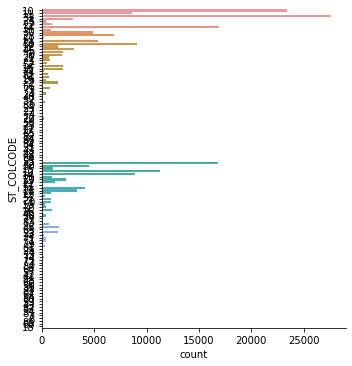

Index:  ST_COLDESC
One parked--one moving                                                 44421
Entering at angle                                                      34674
From same direction - both going straight - one stopped - rear-end     25771
Fixed object                                                           13554
From same direction - both going straight - both moving - sideswipe    12777
                                                                       ...  
Vehicle Strikes All Other Non-Domestic Animal                              2
Railway Vehicle Strikes Pedalcyclist                                       2
Non-domestic animal (deer, bear, elk, etc)                                 1
Vehicle Hits State Road or Construction Machinery                          1
Vehicle Strikes Deer                                                       1
Name: ST_COLDESC, Length: 62, dtype: int64


<Figure size 432x288 with 0 Axes>

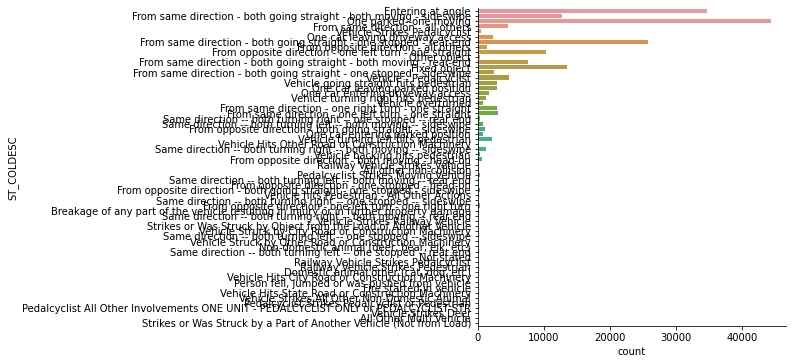

Index:  HITPARKEDCAR
N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64


<Figure size 432x288 with 0 Axes>

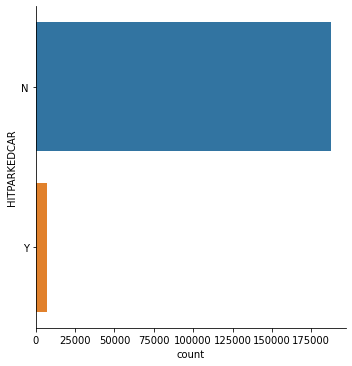

In [29]:
print(df.info())
object_types = ["ADDRTYPE", "SEVERITYDESC", "STATUS", \
                "COLLISIONTYPE", "JUNCTIONTYPE", "SDOT_COLDESC", "INATTENTIONIND", "UNDERINFL", \
               "WEATHER", "ROADCOND", "LIGHTCOND", "PEDROWNOTGRNT", "SPEEDING", \
               "ST_COLCODE", "ST_COLDESC", "HITPARKEDCAR"]
for ind in object_types:
    print("Index: ", ind)
    print(df[ind].value_counts())
    plt.figure()
    sns.catplot(y=ind, kind="count", data=df)
    plt.show()

### Plot numeric type columns

Column is:  SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64


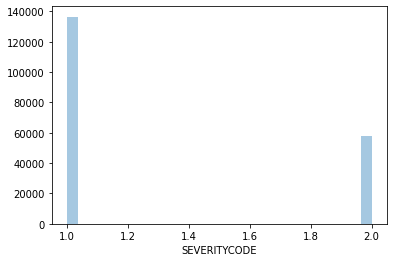

Column is:  PERSONCOUNT
2     114231
3      35553
4      14660
1      13154
5       6584
0       5544
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64


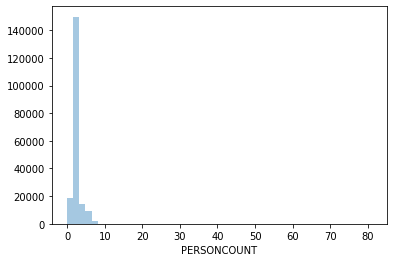

Column is:  PEDCOUNT
0    187734
1      6685
2       226
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64


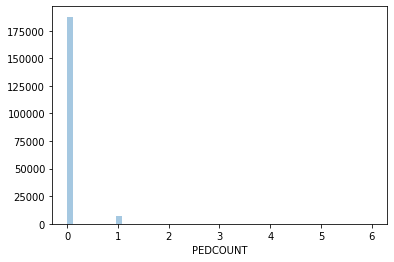

Column is:  PEDCYLCOUNT
0    189189
1      5441
2        43
Name: PEDCYLCOUNT, dtype: int64


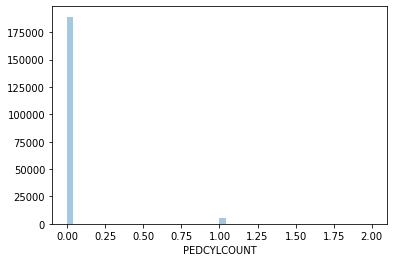

Column is:  VEHCOUNT
2     147650
1      25748
3      13010
0       5085
4       2426
5        529
6        146
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64


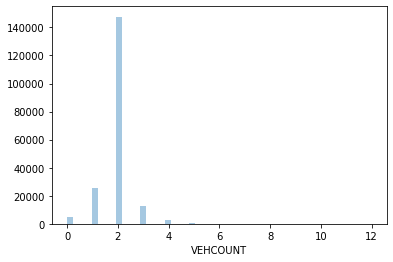

Column is:  SDOT_COLCODE
11    85209
14    54299
16     9928
0      9787
28     8856
24     6518
13     5852
26     4741
18     3104
15     1604
12     1440
51     1312
29      479
21      181
56      180
27      166
54      139
23      124
48      107
31      104
25      102
34       93
64       75
69       69
33       53
55       50
66       23
22       17
32       12
53        9
44        8
61        7
35        6
58        5
68        4
36        4
46        3
52        2
47        1
Name: SDOT_COLCODE, dtype: int64


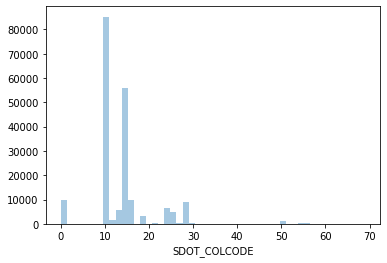

Column is:  SDOTCOLNUM
4116034.0     2
11200007.0    2
4112025.0     2
4116048.0     2
5036003.0     1
             ..
6262043.0     1
6162018.0     1
6277003.0     1
8267022.0     1
5071015.0     1
Name: SDOTCOLNUM, Length: 114932, dtype: int64


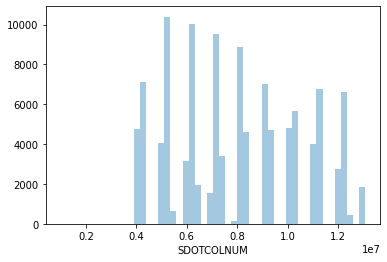

Column is:  SEGLANEKEY
0         191907
6532          19
6078          16
12162         15
10336         14
           ...  
35157          1
10817          1
15043          1
525169         1
16376          1
Name: SEGLANEKEY, Length: 1955, dtype: int64


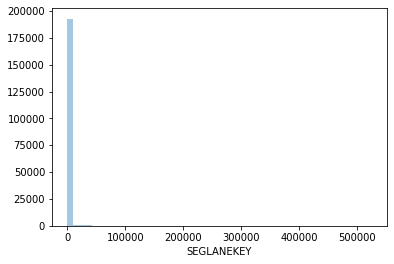

In [30]:
number_types = ["SEVERITYCODE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "SDOT_COLCODE", \
                "SDOTCOLNUM", "SEGLANEKEY"]
for ind in number_types:
    print("Column is: ", ind)
    plt.figure()
    sns.distplot(df[ind], kde=False)
    print(df[ind].value_counts())
    plt.show()

### Analysis to drop other un-related columns

['INTKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'X', 'Y', 'INCKEY', 'OBJECTID', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC', 'SDOT_COLDESC', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'INCDATE', 'INCDTTM', 'UNDERINFL', 'SPEEDING', 'PEDCYLCOUNT', 'PEDCYLCOUNT', 'WEATHER', 'PERSONCOUNT', 'JUNCTIONTYPE', 'X', 'Y', 'INCKEY', 'OBJECTID', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC', 'SDOT_COLDESC', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'INCDATE', 'INCDTTM', 'UNDERINFL', 'SPEEDING', 'PEDCYLCOUNT', 'PEDCYLCOUNT', 'WEATHER', 'PERSONCOUNT', 'JUNCTIONTYPE', 'HITPARKEDCAR']


<Figure size 432x288 with 0 Axes>

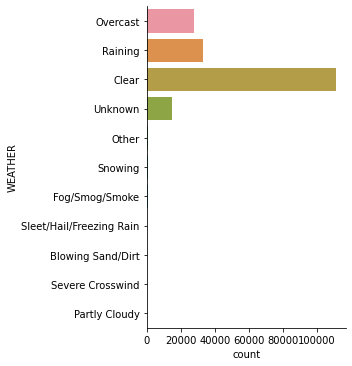

<Figure size 432x288 with 0 Axes>

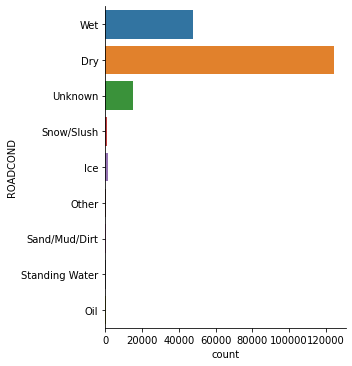

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Test weather
plt.figure()
sns.catplot(y="WEATHER", kind="count", data = df) #drop, this will be reflected on road condition

plt.figure()
sns.catplot(y="ROADCOND", kind="count", data=df)

columns_tobe_cleaned += ["X", "Y", "INCKEY", "OBJECTID", "COLDETKEY", "REPORTNO",\
                         "STATUS", "INTKEY", "LOCATION", "SEVERITYCODE.1", \
                         "SEVERITYDESC", "SDOT_COLDESC", "ST_COLDESC", \
                         "SEGLANEKEY", "CROSSWALKKEY", "INCDATE", \
                         "INCDTTM", "UNDERINFL", "SPEEDING", "PEDCYLCOUNT","PEDCYLCOUNT", "WEATHER", \
                         "PERSONCOUNT", "JUNCTIONTYPE", "HITPARKEDCAR"]

print(columns_tobe_cleaned)

### Initial data drop

In [21]:
df_cleaned = df.drop(labels = columns_tobe_cleaned, axis=1)
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SEVERITYCODE   194673 non-null  int64 
 1   ADDRTYPE       192747 non-null  object
 2   COLLISIONTYPE  189769 non-null  object
 3   PEDCOUNT       194673 non-null  int64 
 4   VEHCOUNT       194673 non-null  int64 
 5   SDOT_COLCODE   194673 non-null  int64 
 6   ROADCOND       189661 non-null  object
 7   LIGHTCOND      189503 non-null  object
 8   ST_COLCODE     194655 non-null  object
dtypes: int64(4), object(5)
memory usage: 13.4+ MB
None


### Test person count, pedestrian count and cyclist count

             PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT
PERSONCOUNT     1.000000 -0.023464    -0.038809
PEDCOUNT       -0.023464  1.000000    -0.016920
PEDCYLCOUNT    -0.038809 -0.016920     1.000000


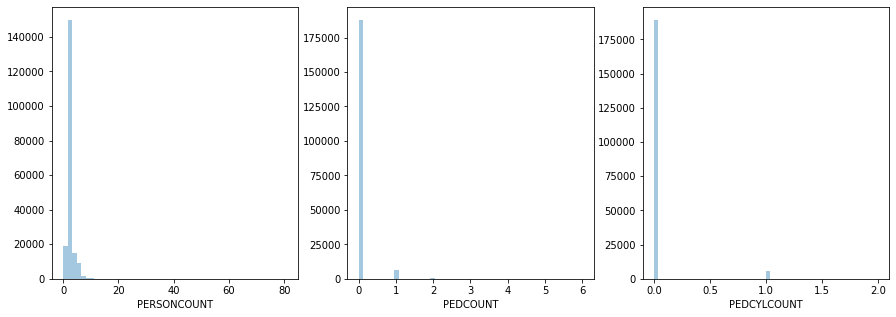

In [39]:
plt.figure(figsize=[15,5])
plt.subplot(1, 3, 1)
sns.distplot(df_cleaned["PERSONCOUNT"], kde=False)
plt.subplot(1, 3, 2)
sns.distplot(df_cleaned["PEDCOUNT"], kde=False)
plt.subplot(1, 3, 3)
sns.distplot(df_cleaned["PEDCYLCOUNT"], kde=False)

### Test address type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   LOCATION        191996 non-null  object 
 10  SEVERITYCODE.1  194673 non-null  int64  
 11  SEVERITYDESC    194673 non-null  object 
 12  COLLISIONTYPE   189769 non-null  object 
 13  PERSONCOUNT     194673 non-null  int64  
 14  PEDCOUNT        194673 non-null  int64  
 15  PEDCYLCOUNT     194673 non-null  int64  
 16  VEHCOUNT        194673 non-null  int64  
 17  INCDATE   

0.19908931632399676

<Figure size 432x288 with 0 Axes>

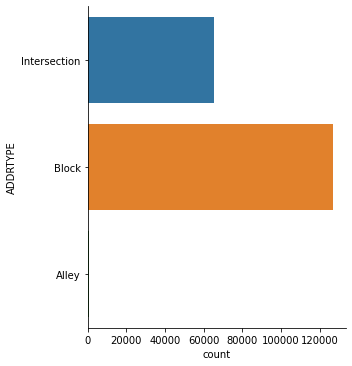

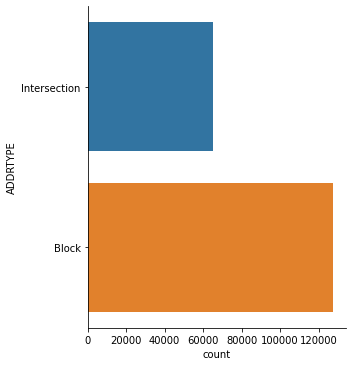

In [33]:
print(df_cleaned.info())
print(df_cleaned.shape)
further_drop = ["INCKEY", "JUNCTIONTYPE"]

# Test Address type
plt.figure()
sns.catplot(y="ADDRTYPE", kind="count", data=df_cleaned)

### Test vehicle count


<AxesSubplot:xlabel='VEHCOUNT'>

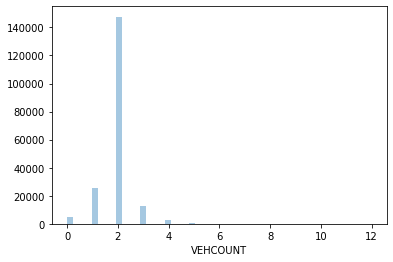

In [125]:
# Test vehicle count
plt.figure()
sns.distplot(df_cleaned["VEHCOUNT"], kde=False) # keep this one


### Test junction type

<Figure size 432x288 with 0 Axes>

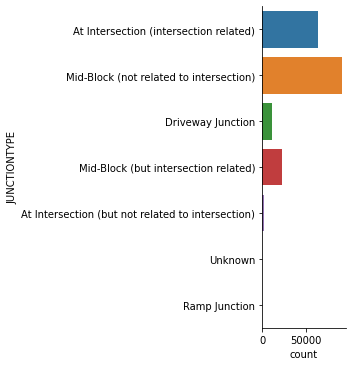

In [70]:
# Test junction type
plt.figure()
sns.catplot(y="JUNCTIONTYPE", kind="count", data=df_cleaned) # Drop this one. It looks like junction type is not directly related to the seveirity

### Test SDOT_COLCODE

/home/wg/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


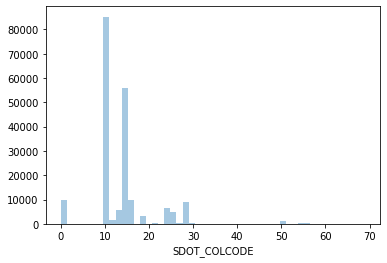

<Figure size 432x288 with 0 Axes>

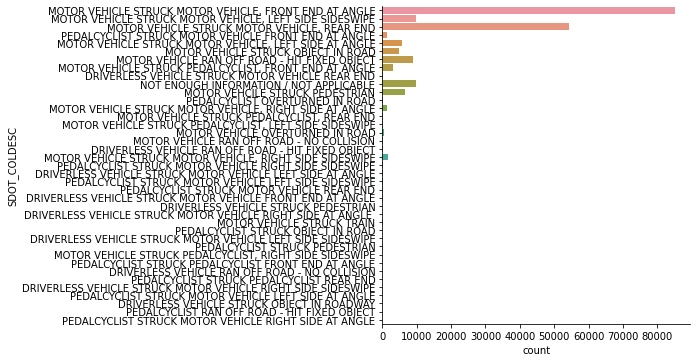

In [60]:

# Tests of SDOT_COLCODE
plt.figure()
sns.distplot(df_cleaned["SDOT_COLCODE"],  kde=False) # keep this one. eg. MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END
plt.figure()
sns.catplot(y="SDOT_COLDESC", kind="count", data=df) # drop this one

### Test weather and road condition

Original data count: 
 Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64
After mergine data count: 
 Dry    139795
Wet     49866
Name: ROADCOND, dtype: int64


<Figure size 432x288 with 0 Axes>

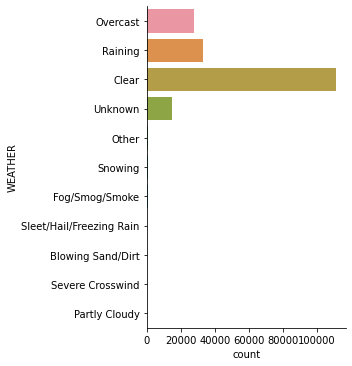

<Figure size 432x288 with 0 Axes>

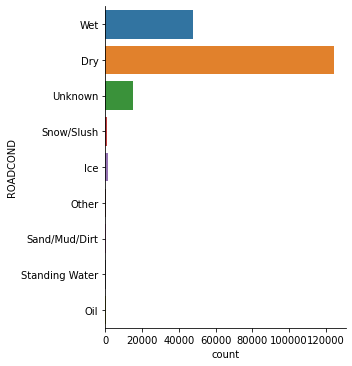

<Figure size 432x288 with 0 Axes>

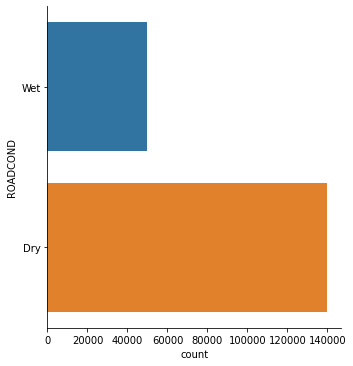

In [58]:
# Test weather
plt.figure()
sns.catplot(y="WEATHER", kind="count", data = df_cleaned) #drop, this will be reflected on road condition

plt.figure()
sns.catplot(y="ROADCOND", kind="count", data=df_cleaned)


Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


<Figure size 432x288 with 0 Axes>

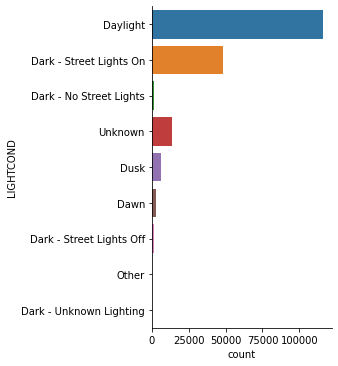

In [134]:
# Test LIGHTCOND
plt.figure()
sns.catplot(y="LIGHTCOND", kind="count", data=df_cleaned)
print(df_cleaned["LIGHTCOND"].value_counts())
daylight_group = [""]

### Data orgnisation

In [19]:
collision type
sns.catplot(y="COLLISIONTYPE", kind="count", data=df_cleaned) # very complicated and drop it
df_cleaned.drop(labels = ["COLLISIONTYPE"], axis=1, inplace=True)


# add a column to df_cleaned
speeding_yes_no = df["SPEEDING"]
speeding_yes_no[pd.isnull(speeding_yes_no)] = "N"
df_cleaned["SPEEDING_YES_NO"] = speeding_yes_no

df_cleaned["ADDRTYPE"].fillna("Block", inplace=True)
df_cleaned["ADDRTYPE"].replace("Alley", "Block", inplace=True) # replace Alley with Block to simplify the attributes.
address_type = pd.get_dummies(df_cleaned["ADDRTYPE"]) #keep this one
df_cleaned = pd.concat([df_cleaned, address_type], axis=1)
df_cleaned.drop(labels = ["ADDRTYPE"], axis=1, inplace=True)


# road condition
df_cleaned["ROADCOND"].fillna("Unknown", inplace=True)
dry_group = ["Unknown", "Other", "Sand/Mud/Dirt"]
wet_group = ["Ice", "Snow/Slush", "Standing Water", "Oil"]
for dd in dry_group:
    df_cleaned["ROADCOND"].replace(dd, "Dry",inplace=True)
for ww in wet_group:
    df_cleaned["ROADCOND"].replace(ww, "Wet",inplace=True)
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned["ROADCOND"])], axis=1)
df_cleaned.drop(labels = ["ROADCOND"], axis=1, inplace=True)


print(df_cleaned.info())



<ipython-input-19-decf458ebd3d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speeding_yes_no[pd.isnull(speeding_yes_no)] = "N"



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   SEVERITYCODE     194673 non-null  int64 
 1   ADDRTYPE         194673 non-null  object
 2   COLLISIONTYPE    189769 non-null  object
 3   PEDCOUNT         194673 non-null  int64 
 4   VEHCOUNT         194673 non-null  int64 
 5   SDOT_COLCODE     194673 non-null  int64 
 6   ROADCOND         194673 non-null  object
 7   LIGHTCOND        189503 non-null  object
 8   ST_COLCODE       194655 non-null  object
 9   HITPARKEDCAR     194673 non-null  object
 10  SPEEDING_YES_NO  194673 non-null  object
 11  Block            194673 non-null  uint8 
 12  Intersection     194673 non-null  uint8 
 13  Dry              194673 non-null  uint8 
 14  Wet              194673 non-null  uint8 
dtypes: int64(4), object(7), uint8(4)
memory usage: 17.1+ MB
None
